<a href="https://colab.research.google.com/github/YuehMintTai/000/blob/main/20211017Rpython_(%E9%9C%80%E4%BD%BF%E7%94%A8colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rpy2

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('pROC')

In [4]:
%%R
myData<-read.csv('dep_result_df')
tail(myData,1)

        X real   predict 軍人 sex   age
4471 4470    1 0.3512212    0   2 29.25


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



  |======================================================================| 100%


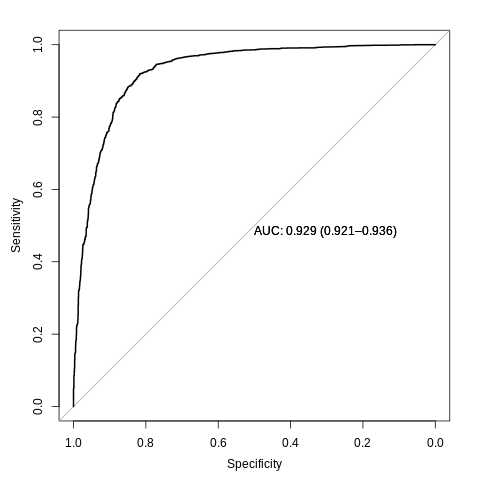

In [26]:
%%R
library(pROC)
pROC_obj<-roc(myData$real,myData$predict,smoothed=FALSE, print.auc=TRUE, ci=TRUE, ci.alpha=0.95, plot=TRUE)
myROC.ci<-ci.se(pROC_obj)
##plot(myROC.ci, type='shape',col='lightblue')

In [ ]:
%%R
install.packages('InformationValue')

In [7]:
%%R
library(InformationValue)
optimal<-optimalCutoff(myData$real,myData$predict)[1]
confusionMatrix(myData$real,myData$predict)
confusionMatrix(myData$real,myData$predict,threshold=optimal)
optimal ##0.1687012
sensitivity(myData$real,myData$predict) #0.7041864
specificity(myData$real,myData$predict) #0.9247035
sensitivity(myData$real,myData$predict,threshold=optimal) ##0.9206161
specificity(myData$real,myData$predict,threshold=optimal) ##0.8127901

[1] 0.8127901


In [8]:
%%R
###select military cases
tail(myData,1)
myData_m<-myData[myData$`軍人`=='1',]
tail(myData_m,1)
myData_c<-myData[myData$軍人=='0',]
tail(myData_c,1)

        X real   predict 軍人 sex   age
4471 4470    1 0.3512212    0   2 29.25


In [9]:
%%R
rocm<-roc(myData_m$real,myData_m$predict)
rocc<-roc(myData_c$real,myData_c$predict)
rocT<-roc(myData$real,myData$predict)
roc.test(rocm,rocc)
roc.test(rocT,rocm)
roc.test(rocT,rocc)

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases




	DeLong's test for two ROC curves

data:  rocT and rocc
D = 2.0353, df = 3716.1, p-value = 0.04189
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.9286641   0.9120201 



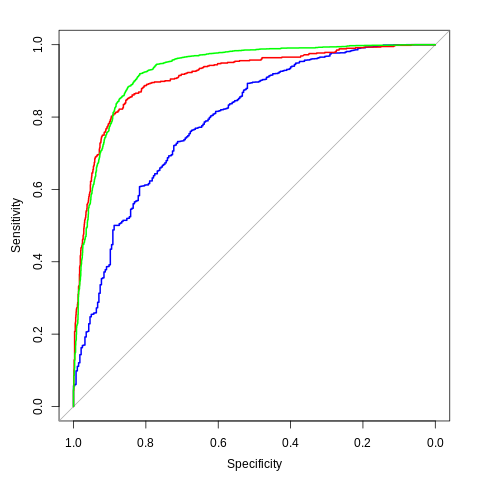

In [10]:
%%R
library(pROC)
plot.roc(rocm,percent=TRUE,col='blue')
lines.roc(rocc,percent=TRUE,col='red')
lines.roc(rocT,col='green')


In [11]:
%%R
##Read military result
mData<-read.csv('mdep_result_df')
tail(mData,2)

        X real   predict sex      age
2210 2209    1 0.8934962   1 27.00000
2211 2210    1 0.5157258   1 20.33333


In [12]:
%%R
rocm1<-roc(myData_m$real,myData_m$predict)
rocm2<-roc(mData$real,mData$predict)
roc.test(rocm1,rocm2)

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases




	DeLong's test for two ROC curves

data:  rocm1 and rocm2
D = -1.5888, df = 4399.8, p-value = 0.1122
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.7921793   0.8247205 



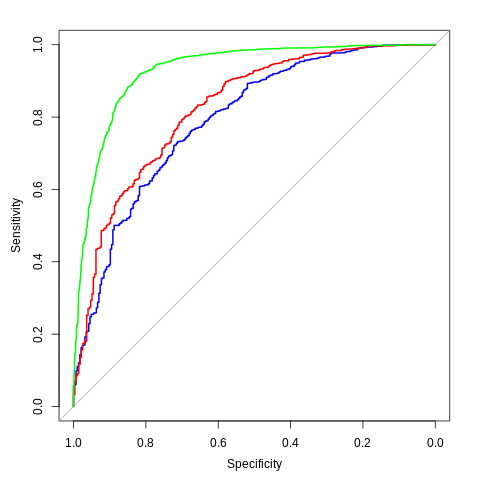

In [13]:
%%R
library(pROC)
plot.roc(rocm1,percent=TRUE,col='blue')
lines.roc(rocm2,percent=TRUE,col='red')
lines.roc(rocT,col='green')


In [14]:
%%R
##Read military result
cData<-read.csv('cdep_result_df')
tail(cData,2)

        X real    predict sex      age
2260 2259    0 0.00251478   1 50.41667
2261 2260    0 0.02293998   1 21.75000


In [15]:
%%R
rocc1<-roc(myData_c$real,myData_c$predict)
rocc2<-roc(cData$real,cData$predict)
roc.test(rocc1,rocc2)

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases




	DeLong's test for two ROC curves

data:  rocc1 and rocc2
D = 0.8569, df = 4516.7, p-value = 0.3915
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.9120201   0.9031823 



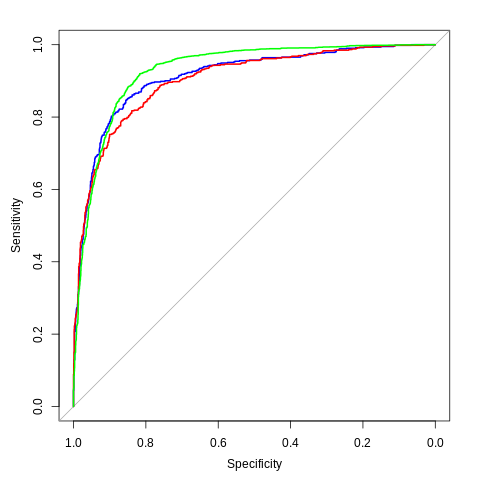

In [16]:
%%R
library(pROC)
plot.roc(rocc1,percent=TRUE,col='blue')
lines.roc(rocc2,percent=TRUE,col='red')
lines.roc(rocT,col='green')

In [127]:
%%R
auc(rocc)

Area under the curve: 0.912


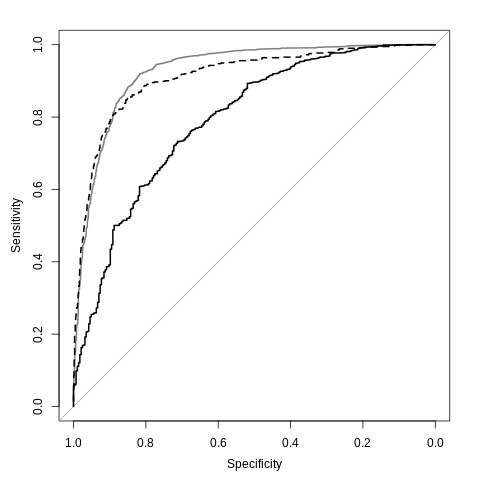

In [123]:
%%R
plot.roc(rocT,col='grey50',print.thres=T,print.thres.col='grey50',print.thres.adj=c(0.5,-2),print.thres.cex=0.01)
plot.roc(rocm,add=T,lty=1,print.thres=T,print.thres.cex=0.01)
plot.roc(rocc,add=T,lty=2,print.thres=T,print.thres.cex=0.01)

In [23]:
%%R
auc(rocc1)
ci(rocc1)
roc.test(rocc1,rocc2, method='delong') ##p=0.3915
roc.test(rocc1,rocc2, method='bootstrap') ##p=0.3881
roc.test(rocc1,rocc2, method='venkatraman') ##p=算很久很久...0.4955

  |======================================================================| 100%
  |========================================================              |  80%

From cffi callback <function _processevents at 0x7fcb979af290>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


  |============================================================          |  86%

From cffi callback <function _processevents at 0x7fcb979af290>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


  |======================================================================| 100%

	Venkatraman's test for two unpaired ROC curves

data:  rocc1 and rocc2
E = 0.0043765, boot.n = 2000, p-value = 0.4955
alternative hypothesis: true difference in at least one ROC operating point is not equal to 0



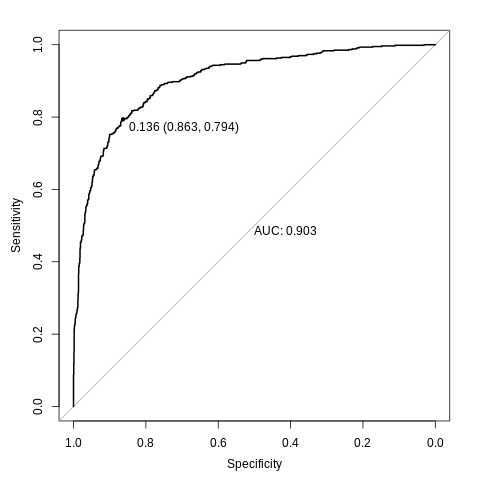

In [40]:
%%R
plot.roc(rocc2,print.auc=TRUE,
     #print.auc.x=0.5,print.auc.y=0.5,auc.polygon=TRUE,
     #auc.polygon.col="skyblue",  # 设置ROC曲线下填充色     
     #max.auc.polygon=TRUE,   # 填充整个图像     
     #partial.auc=c(1, 0.5), 
     #partial.auc.focus="sp",  # sp改为se试试     
     #grid=c(0.1, 0.2),grid.col=c("green", "red"), # 设置间距为0.1，0.2，线条颜色     
     print.thres=TRUE,   # 图像上输出最佳截断值     
     reuse.auc=F)


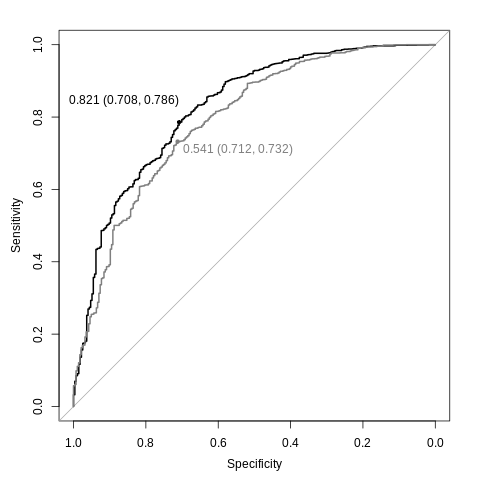

In [149]:
%%R
plot.roc(rocm2,print.thres=T,print.thres.adj=c(1,-2),print.thres.cex=1)
plot.roc(rocm1,add=T,print.thres=T,col='grey50',print.thres.col='grey50',print.thres.cex=1)

In [152]:
%%R
auc(rocm2)
roc.test(rocm1,rocm2)


	DeLong's test for two ROC curves

data:  rocm1 and rocm2
D = -1.5888, df = 4399.8, p-value = 0.1122
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.7921793   0.8247205 



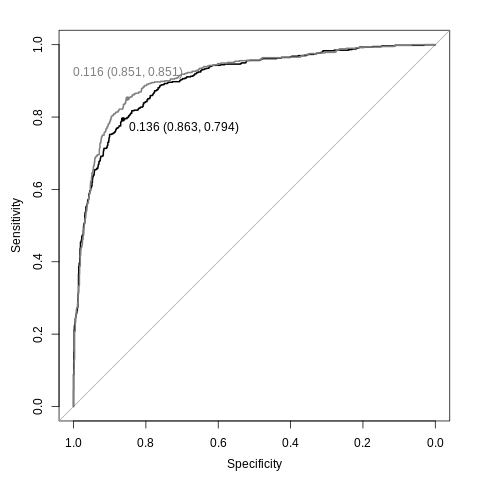

In [140]:
%%R
plot.roc(rocc2,print.thres=T,print.thres.cex=1)
plot.roc(rocc1,add=T,print.thres=T,col='grey50',print.thres.col='grey50',print.thres.adj=c(0.5,-2.5),print.thres.cex=1)

In [141]:
%%R
auc(rocc2)

Area under the curve: 0.9032


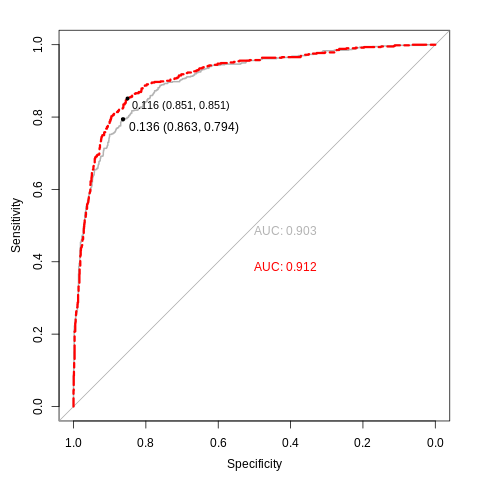

In [87]:
%%R
plot.roc(rocc2,print.auc=TRUE,print.thres=TRUE,col='grey70')
plot.roc(rocc1,add=TRUE,col='red',
    print.thres=TRUE,print.thres.cex=0.9, ##字體縮放倍數
    print.auc=TRUE,print.auc.x=0.5, print.auc.y=0.4,
    smooth=T,lty=6,lwd=3 ##linetype=lty, lwd=linewidth
    )